In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
# import required libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [45]:
# read the dataset
df = pd.read_csv('/content/drive/MyDrive/colombo_rh_2012-2018.csv',parse_dates=True)

# Data analyzing and preprocessing

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4403 entries, 0 to 4402
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_id    4403 non-null   int64  
 1   station_name  4403 non-null   object 
 2   element_name  4403 non-null   object 
 3   year          4403 non-null   int64  
 4   month         4403 non-null   int64  
 5   day           4403 non-null   int64  
 6   obs_val       4383 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 240.9+ KB


In [47]:
df.head()

,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0


In [48]:
# check for null values
df.isnull().sum()

station_id       0
station_name     0
element_name     0
year             0
month            0
day              0
obs_val         20
dtype: int64

In [49]:
# drop the rows which have null for 'obs_val'
df=df.dropna()

In [50]:
# create the 'date' column by concatenating the values of the 'year', 'month', and 'day' columns in the format 'YYYY-MM-DD'
df['date']=pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) +' -' + df['day'].astype(str),yearfirst=True)
df.head()

,station_id,station_name,element_name,year,month,day,obs_val,date
0,43466,COLOMBO,RHMAX,2012,1,1,91.0,2012-01-01
1,43466,COLOMBO,RHMAX,2012,1,2,90.0,2012-01-02
2,43466,COLOMBO,RHMAX,2012,1,3,89.0,2012-01-03
3,43466,COLOMBO,RHMAX,2012,1,4,89.0,2012-01-04
4,43466,COLOMBO,RHMAX,2012,1,5,95.0,2012-01-05


In [51]:
# drop unnecessary columns
df=df.drop(columns=["station_id",'station_name','element_name','year','month','day'])
df.head()

,obs_val,date
0,91.0,2012-01-01
1,90.0,2012-01-02
2,89.0,2012-01-03
3,89.0,2012-01-04
4,95.0,2012-01-05


In [52]:
# set 'date' as the index
df=df.set_index('date')
df.head()

,obs_val
date,
2012-01-01,91.0
2012-01-02,90.0
2012-01-03,89.0
2012-01-04,89.0
2012-01-05,95.0


<Axes: xlabel='date'>

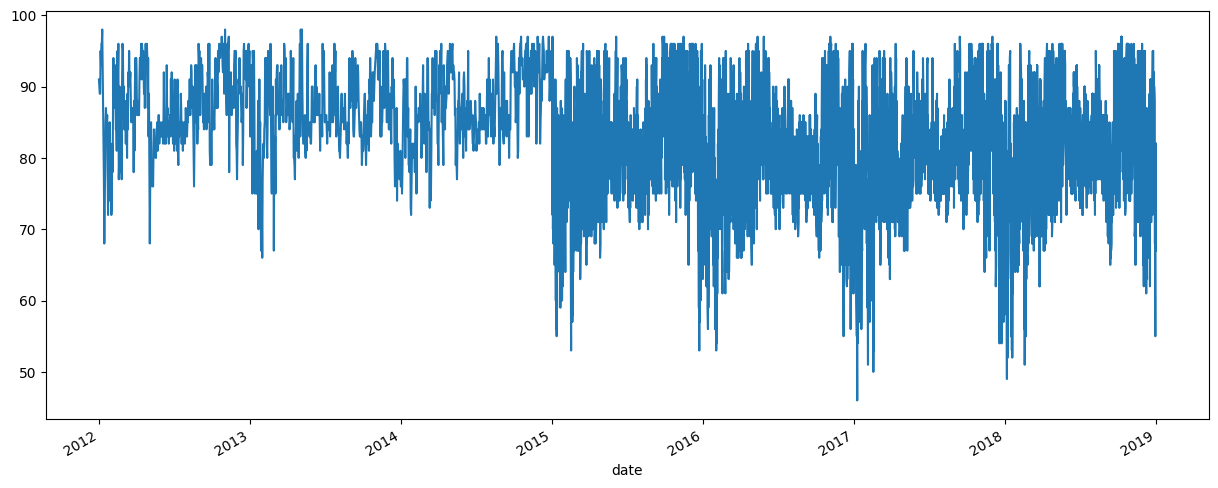

In [54]:
# plot the 'obs_val'
df['obs_val'].plot(figsize=(15,6))

# Check if Time Series data is Stationary

In [55]:
# augmented Dickey-Fuller test 
def ad_test(data):
    df_result=adfuller(data, autolag='AIC')
    # print("P-Value:" ,dftest[0])
    print('ADF Statistic: %f' % df_result[0])
    print('p-value: %f' % df_result[1])
    print('Critical Values:')
    for key, value in df_result[4].items():
      print('\t%s: %.3f' % (key, value))

In [56]:
ad_test(df['obs_val'])

ADF Statistic: -4.014920
p-value: 0.001334
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


The ADF test statistic value is -4.014920. A more negative value of this statistic indicates a higher likelihood that the dataset is stationary. And also, statistic value of -4.014920 is less than the value of -3.432 at 1%.

p-value is 0.001334, and p-value <= 0.05. Which means the data is stationary.

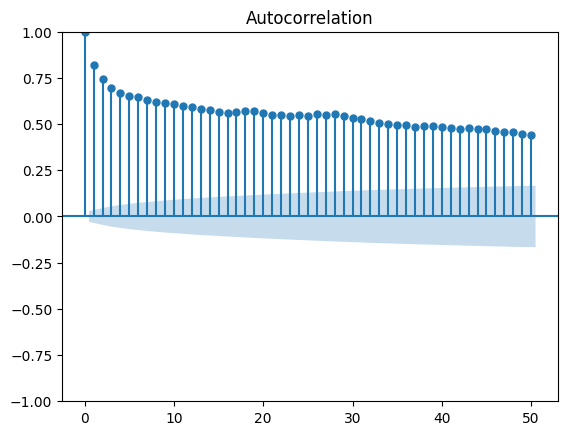

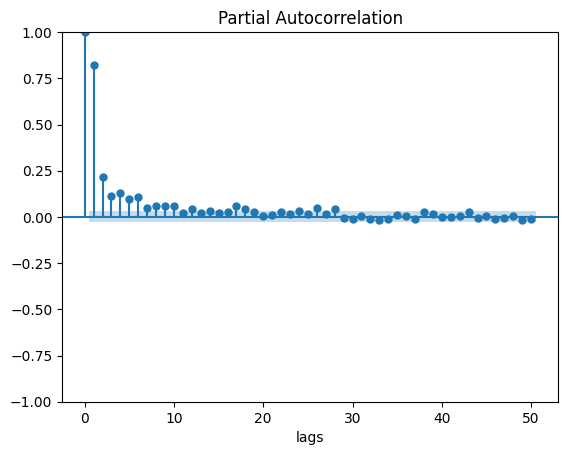

In [59]:
# obtain ACF and PACF plots
plot_acf(df['obs_val'], lags=50)
plot_pacf(df['obs_val'], lags=50)
plt.xlabel('lags')
plt.show()

# Training the ARIMA model

In [60]:
# find the best parameters for p,d,q
best_model=auto_arima(df['obs_val'], trace=True,suppress_warnings=True)
best_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25785.544, Time=5.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26700.488, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26333.327, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26123.466, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26698.488, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25786.441, Time=3.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25785.853, Time=2.80 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=25784.378, Time=6.76 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=25787.339, Time=5.38 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=25786.321, Time=9.72 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=25786.442, Time=10.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=25784.297, Time=7.88 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=25787.795, Time=5.28 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=25786.222, Time=12.69 sec
 ARIMA(1,1,4)(0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4383
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -12885.149
Date:                Fri, 05 May 2023   AIC                          25782.298
Time:                        16:07:53   BIC                          25820.609
Sample:                             0   HQIC                         25795.815
                               - 4383                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3527      0.055     -6.373      0.000      -0.461      -0.244
ar.L2          0.5395      0.045     11.909      0.000       0.451       0.628
ma.L1         -0.0880      0.057     -1.545      0.122      -0.200       0.024
ma.L2         -0.8450      0.062    -13.556      0.000      -0.967      -0.723
ma.L3          0.0697      0.029      2.430      0.015       0.013       0.126
sigma2        20.9652      0.341     61.469      0.000      20.297      21.634
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               445.84
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
# split train and test datasets

# excluding last 30 rows for training set
train_df=df.iloc[:-30]

# including only last 30 rows for testing set
test_df=df.iloc[-30:]

In [62]:
# training ARIMA model with best parameters
arima_model = ARIMA(train_df['obs_val'], order=(2,1,3))
arima_model = arima_model.fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                obs_val   No. Observations:                 4353
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -12797.846
Date:                Fri, 05 May 2023   AIC                          25607.692
Time:                        16:09:21   BIC                          25645.962
Sample:                             0   HQIC                         25621.200
                               - 4353                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3545      0.053     -6.631      0.000      -0.459      -0.250
ar.L2          0.5429      0.044     12.292      0.000       0.456       0.629
ma.L1         -0.0870      0.055     -1.577      0.1

In [63]:
# predict the test set
start_index = len(train_df)
end_index = len(train_df) + len(test_df) - 1
predictions = arima_model.predict(start=start_index, end=end_index, type='levels')
predictions.index = df.index[start_index:end_index+1]
print(predictions)

date
2018-12-02    85.645714
2018-12-03    87.087447
2018-12-04    88.277440
2018-12-05    88.638299
2018-12-06    89.156440
2018-12-07    89.168660
2018-12-08    89.445640
2018-12-09    89.354074
2018-12-10    89.536918
2018-12-11    89.422380
2018-12-12    89.562259
2018-12-13    89.450480
2018-12-14    89.566054
2018-12-15    89.464391
2018-12-16    89.563183
2018-12-17    89.472962
2018-12-18    89.558585
2018-12-19    89.479245
2018-12-20    89.553861
2018-12-21    89.484331
2018-12-22    89.549493
2018-12-23    89.488641
2018-12-24    89.545594
2018-12-25    89.492364
2018-12-26    89.542157
2018-12-27    89.495604
2018-12-28    89.539142
2018-12-29    89.498431
2018-12-30    89.536503
2018-12-31    89.500902
Name: predicted_mean, dtype: float64


<Axes: xlabel='date'>

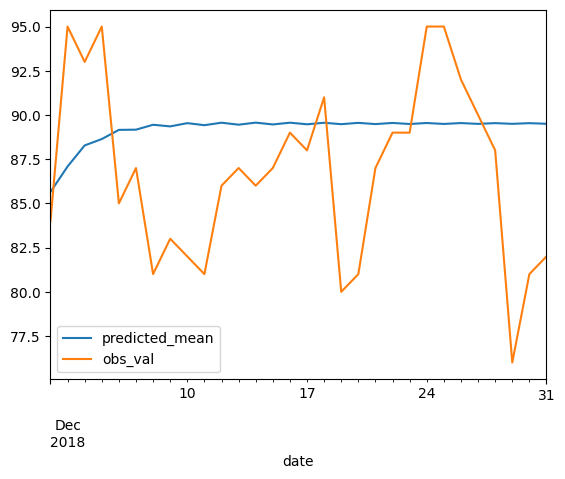

In [64]:
# plot predictions and test set values
predictions.plot(legend=True)
test_df['obs_val'].plot(legend=True)

In [65]:
# get the date range
start_date = '2012-01-01'
end_date = '2024-05-31'
date_range = pd.date_range(start=start_date, end=end_date)

# Past 12 months prediction

In [66]:
past_pred_start = '2022-05-05'
past_pred_end = '2023-05-05'
start_date = date_range.get_loc(past_pred_start)
end_date = date_range.get_loc(past_pred_end)

index_past = pd.date_range(start=past_pred_start,end=past_pred_end)

pred_past=arima_model.predict(start=start_date,end=end_date).rename("Past Predictions")

pred_past.index=index_past
pred_past = pred_past.rename_axis('dt')
print(pred_past)

dt
2022-05-05    73.222364
2022-05-06    72.667229
2022-05-07    73.000187
2022-05-08    75.406009
2022-05-09    77.896361
                ...    
2023-05-01    86.584804
2023-05-02    85.661318
2023-05-03    90.996295
2023-05-04    91.296732
2023-05-05    89.448165
Freq: D, Name: Past Predictions, Length: 366, dtype: float64


<Axes: xlabel='dt'>

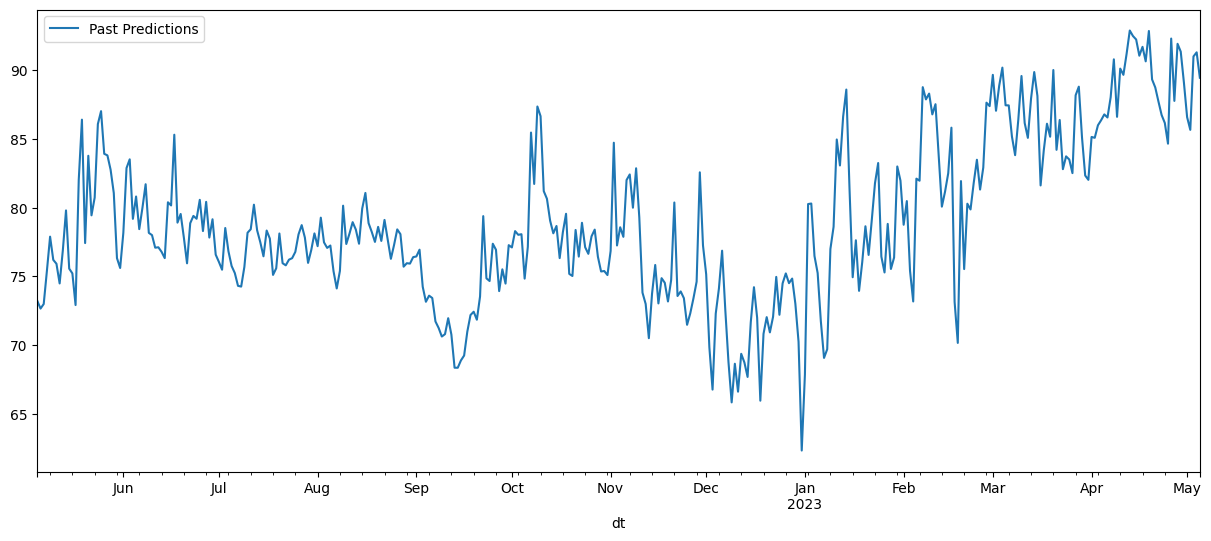

In [67]:
pred_past.plot(figsize=(15,6),legend=True)

In [68]:
pred_past.to_csv("past_prediction.csv")

# Future 12 months prediction

In [69]:
future_pred_start = '2023-05-05'
future_pred_end = '2024-05-05'
start_date = date_range.get_loc(future_pred_start)
end_date = date_range.get_loc(future_pred_end)

index_future = pd.date_range(start=future_pred_start,end=future_pred_end)

pred_future = arima_model.predict(start=start_date,end=end_date).rename("Future Predictions")

pred_future.index=index_future
pred_future = pred_future.rename_axis('dt')
print(pred_future)

dt
2023-05-05    89.448165
2023-05-06    91.753814
2023-05-07    89.139125
2023-05-08    90.590518
2023-05-09    91.908041
                ...    
2024-05-01    89.518102
2024-05-02    89.518111
2024-05-03    89.518102
2024-05-04    89.518111
2024-05-05    89.518103
Freq: D, Name: Future Predictions, Length: 367, dtype: float64


<Axes: xlabel='dt'>

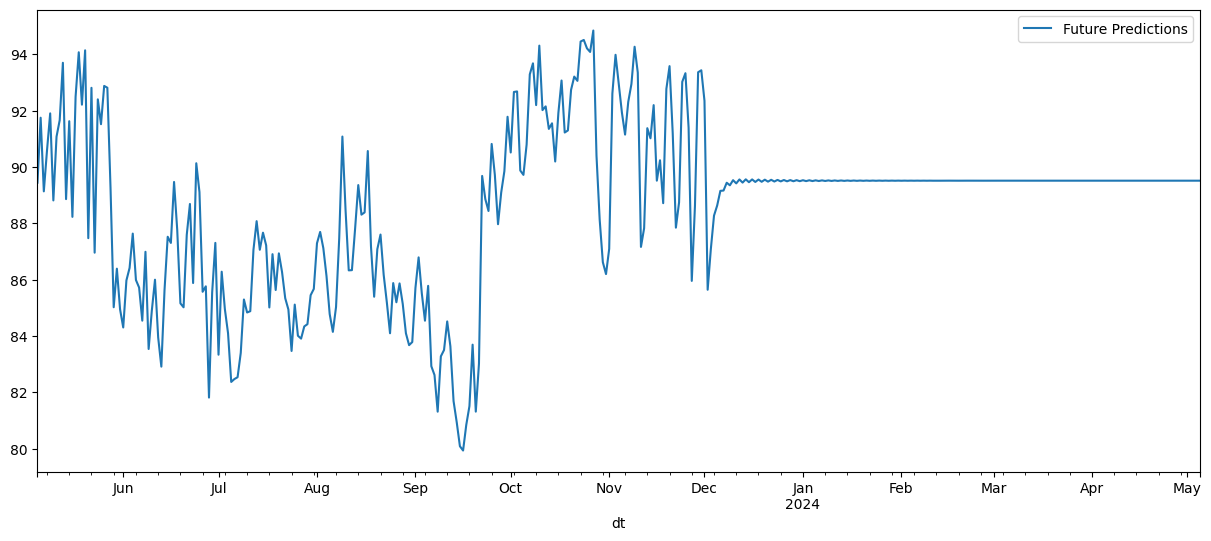

In [70]:
pred_future.plot(figsize=(15,6),legend=True)

In [71]:
pred_future.to_csv("future_prediction.csv")